#Assignment Code: DA-AG-017
#Clustering | Assignment

Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

Answer:

K-Means Clustering:

Type: Partition-based clustering

How it works: Divides data into k non-overlapping clusters by minimizing the variance within each cluster.

Scalability: Fast and scalable to large datasets.

Requirement: Number of clusters (k) must be specified in advance.

Use Case: Customer segmentation in a retail store with millions of customer records.

Hierarchical Clustering:

Type: Hierarchical (agglomerative or divisive)

How it works: Builds a tree (dendrogram) of clusters. Does not require specifying k initially.

Scalability: Slower on large datasets due to its recursive nature.

Use Case: Gene expression analysis in bioinformatics with smaller datasets.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

Answer:

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1:

+1: Well clustered

0: On the decision boundary

-1: Possibly wrongly clustered

Purpose:

To evaluate cluster quality without ground truth labels.

To compare clustering models or determine the optimal number of clusters.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer:

eps (epsilon): The maximum distance between two samples for one to be considered in the neighborhood of the other.

min_samples: The minimum number of points required to form a dense region (i.e., a core point).

Influence:

High eps and low min_samples → large clusters, more noise absorbed.

Low eps and high min_samples → small, tight clusters, more outliers.

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Answer:

Most clustering algorithms (e.g., K-Means, DBSCAN) use distance metrics (like Euclidean distance). If features are on different scales, features with larger ranges dominate the distance calculation, leading to biased clustering.

Scaling (e.g., StandardScaler) ensures:

All features contribute equally.

Better cluster shapes and detection.

Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Answer:

The Elbow Method involves:

Plotting the inertia (sum of squared distances of samples to their closest cluster center) against different values of k (number of clusters).

The "elbow" point (where inertia starts to decrease more slowly) is considered the optimal number of clusters.

This point balances clustering quality and simplicity.


Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)   
Dataset:
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.

Answer:

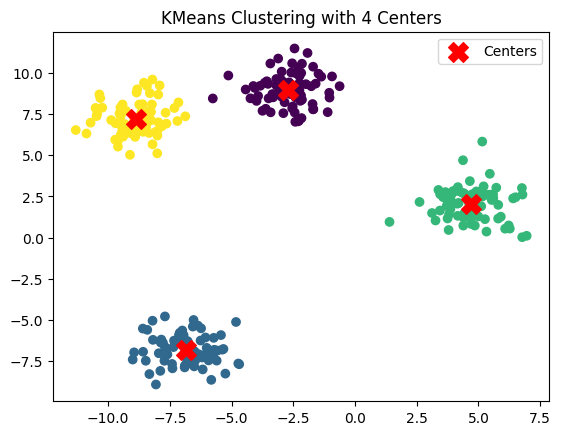

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centers')
plt.title("KMeans Clustering with 4 Centers")
plt.legend()
plt.show()


Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).   
(Include your Python code and output in the code box below.)  

Answer:

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load and scale data
data = load_wine()
X = StandardScaler().fit_transform(data.data)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Count clusters (excluding noise: label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")


Number of clusters found: 0


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.  
(Include your Python code and output in the code box below.)  
Answer:  

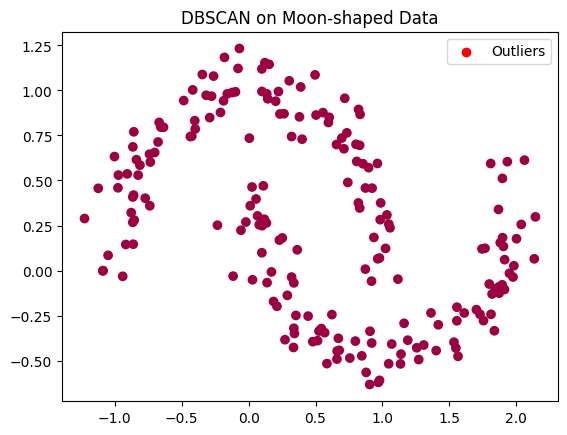

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot
plt.scatter(X[labels != -1, 0], X[labels != -1, 1], c=labels[labels != -1], cmap='Spectral')
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='red', label='Outliers')
plt.title("DBSCAN on Moon-shaped Data")
plt.legend()
plt.show()


Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.  
(Include your Python code and output in the code box below.)  
Answer:

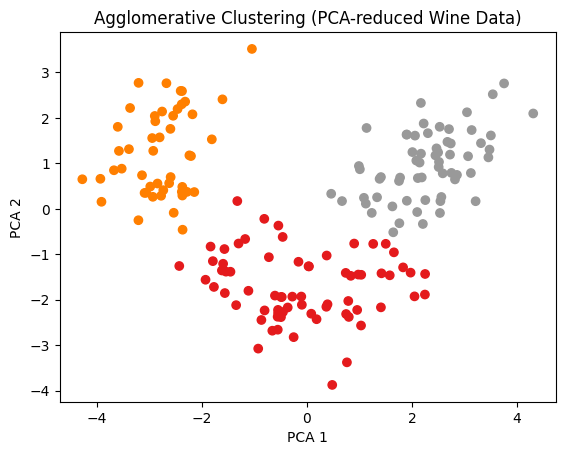

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load and scale
X = StandardScaler().fit_transform(data.data)

# Reduce to 2D
X_pca = PCA(n_components=2).fit_transform(X)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1')
plt.title("Agglomerative Clustering (PCA-reduced Wine Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.  
Describe your real-world data science workflow using clustering:  
● Which clustering algorithm(s) would you use and why?  
● How would you preprocess the data (missing values, scaling)?   
● How would you determine the number of clusters?  
● How would the marketing team benefit from your clustering analysis?  
(Include your Python code and output in the code box below.)  
Answer:  

 Workflow Description:

1. Clustering Algorithm:

Use K-Means for quick, interpretable results on large data.

Consider DBSCAN if data has noise or arbitrary shapes.

Hierarchical Clustering for deep exploration on smaller subsets.

2. Preprocessing:

Handle missing values: impute or remove.

Encode categorical features.

Use StandardScaler to normalize numerical features.

3. Choosing Cluster Number:

Use Elbow Method and Silhouette Score for K-Means.

DBSCAN doesn't require k, but requires tuning eps and min_samples.

4. Marketing Benefits:

Segment customers into behavior-based groups.

Create targeted promotions (e.g., for big spenders, deal hunters).

Personalize emails or offers → increase conversion rates.

🧪 Sample Python Code (K-Means Workflow):

Optimal clusters: 4


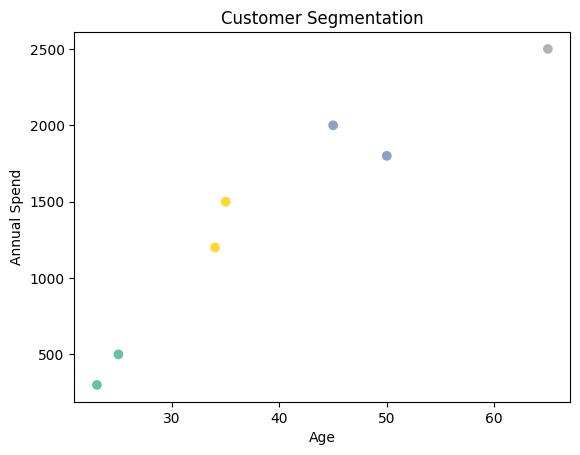

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Simulated customer data
data = pd.DataFrame({
    'Age': [25, 45, 23, 35, 65, 34, 50],
    'Annual_Spend': [500, 2000, 300, 1500, 2500, 1200, 1800]
})

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Find optimal k using Silhouette
scores = []
k_range = range(2, 6)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    scores.append(score)

optimal_k = k_range[scores.index(max(scores))]
print(f"Optimal clusters: {optimal_k}")

# Final model
final_model = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = final_model.fit_predict(scaled_data)

# Visualize
plt.scatter(data['Age'], data['Annual_Spend'], c=data['Cluster'], cmap='Set2')
plt.title("Customer Segmentation")
plt.xlabel("Age")
plt.ylabel("Annual Spend")
plt.show()
